In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

/home/ralvi/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_csv("spambase.data")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,CLASS
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
Y = df['CLASS'].values
X = df.drop(columns=['CLASS']).values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0, stratify=Y)

In [5]:
def plot_confusion_matrix(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    sn.heatmap(cf_matrix)

## Naїv Bayes

In [6]:
from sklearn.naive_bayes import BernoulliNB

gnb = BernoulliNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [7]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Success rate: " + str(1 - (y_test != y_pred).sum() / X_test.shape[0]))

Number of mislabeled points out of a total 2301 points : 261
Success rate: 0.8865710560625815


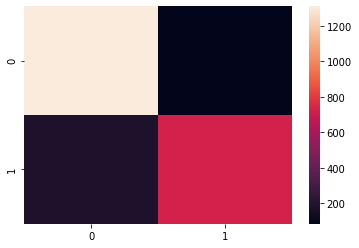

In [8]:
plot_confusion_matrix(y_test, y_pred)

In [9]:
f1_score(y_test, y_pred, average='weighted')

0.8853055915826722

In [10]:
fbeta_score(y_test, y_pred, average='macro', beta=0.5)

0.884546526191704

## kNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=100)
y_pred = neigh.fit(X_train, y_train).predict(X_test)

In [27]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Success rate: " + str(1 - (y_test != y_pred).sum() / X_test.shape[0]))

Number of mislabeled points out of a total 2301 points : 514
Success rate: 0.7766188613646241


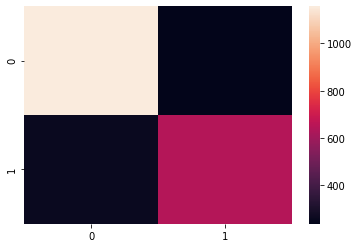

In [13]:
plot_confusion_matrix(y_test, y_pred)

In [14]:
f1_score(y_test, y_pred, average='weighted')

0.7825861794402746

In [15]:
fbeta_score(y_test, y_pred, average='macro', beta=0.5)

0.7727081735392093